import library

In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

from sklearn.cluster import DBSCAN


# **Preprocessing**

In [80]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


import dataset

In [81]:
spot_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/spotify.csv')
spot_data

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,liked
0,0.803,0.6240,7,-6.764,0,0.0477,0.4510,0.000734,0.1000,0.6280,95.968,304524,4,0
1,0.762,0.7030,10,-7.951,0,0.3060,0.2060,0.000000,0.0912,0.5190,151.329,247178,4,1
2,0.261,0.0149,1,-27.528,1,0.0419,0.9920,0.897000,0.1020,0.0382,75.296,286987,4,0
3,0.722,0.7360,3,-6.994,0,0.0585,0.4310,0.000001,0.1230,0.5820,89.860,208920,4,1
4,0.787,0.5720,1,-7.516,1,0.2220,0.1450,0.000000,0.0753,0.6470,155.117,179413,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,0.166,0.0551,9,-19.494,0,0.0520,0.9760,0.635000,0.1190,0.1430,176.616,206520,3,0
191,0.862,0.6240,3,-11.630,1,0.0565,0.0192,0.000153,0.0465,0.8820,124.896,254240,4,0
192,0.499,0.3510,9,-11.509,0,0.0448,0.9510,0.000099,0.1180,0.6160,90.664,235947,4,0
193,0.574,0.7290,10,-5.838,0,0.0965,0.0406,0.000004,0.1940,0.4130,110.547,190239,5,1


scale match_data menjadi 4 kolom

In [82]:
scaler = StandardScaler()
spot_data_scale = spot_data[['danceability', 'energy', 'key', 'loudness']]
spot_data_scale

,danceability,energy,key,loudness
0,0.803,0.6240,7,-6.764
1,0.762,0.7030,10,-7.951
2,0.261,0.0149,1,-27.528
3,0.722,0.7360,3,-6.994
4,0.787,0.5720,1,-7.516
...,...,...,...,...
190,0.166,0.0551,9,-19.494
191,0.862,0.6240,3,-11.630
192,0.499,0.3510,9,-11.509
193,0.574,0.7290,10,-5.838


In [83]:
spot_data_scale = scaler.fit_transform(spot_data_scale)
spot_data_scale.shape

(195, 4)

In [84]:
spot_data_scale[:5]

array([[ 0.7699031 , -0.05562809,  0.44109502,  0.4175617 ],
       [ 0.58013908,  0.24888794,  1.32177961,  0.23518014],
       [-1.73868457, -2.40348527, -1.32027416, -2.77280956],
       [ 0.39500346,  0.37609084, -0.7331511 ,  0.38222239],
       [ 0.69584885, -0.25606903, -1.32027416,  0.30201753]])

In [85]:
data = pd.DataFrame(spot_data_scale)
data.rename(columns={0:"danceability", 1:"energy", 2:"key", 3:"loudness"}, inplace=True)

data_cluster = data.copy()
data.head()

,danceability,energy,key,loudness
0,0.769903,-0.055628,0.441095,0.417562
1,0.580139,0.248888,1.321780,0.235180
2,-1.738685,-2.403485,-1.320274,-2.772810
3,0.395003,0.376091,-0.733151,0.382222
4,0.695849,-0.256069,-1.320274,0.302018


In [86]:
data.describe()

,danceability,energy,key,loudness
count,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02
mean,-1.411976e-16,4.006766e-17,-3.188333e-17,2.157818e-16
std,1.002574e+00,1.002574e+00,1.002574e+00,1.002574e+00
min,-2.345004e+00,-2.451668e+00,-1.613836e+00,-5.036523e+00
25%,-8.060639e-01,-4.044724e-01,-1.026713e+00,-7.380833e-02
50%,3.163208e-01,7.928408e-02,1.475335e-01,2.636052e-01
75%,7.513895e-01,7.673361e-01,7.346565e-01,5.612237e-01
max,1.431763e+00,1.378296e+00,1.615341e+00,1.097920e+00


# **Kmeans Algorithm**

buat list inertia

In [87]:
clusters = []
for i in range(1,11):
    km = KMeans(n_clusters=i).fit(data)
    clusters.append(km.inertia_)

tampilkan plot

Text(0, 0.5, 'inertia')

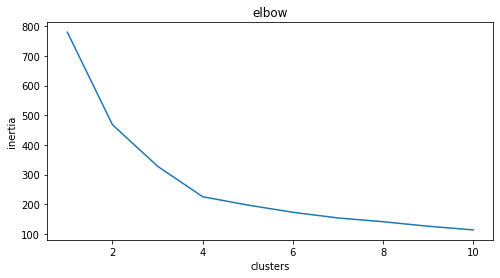

In [88]:
fig, ax = plt.subplots(figsize=(8,4))
sns.lineplot(x=list(range(1,11)), y=clusters, ax=ax)
ax.set_title('elbow')
ax.set_xlabel('clusters')
ax.set_ylabel('inertia')

melatih model

In [89]:
# create model
model_kmeans3 = KMeans(n_clusters=3)
model_KMeans4 = KMeans(n_clusters=4)


# train model
model_kmeans3.fit(data)
model_KMeans4.fit(data)

# menambah label
data_cluster['cluster_kmeans3'] = model_kmeans3.labels_
data_cluster['cluster_kmeans4'] = model_KMeans4.labels_

data_cluster

,danceability,energy,key,loudness,cluster_kmeans3,cluster_kmeans4
0,0.769903,-0.055628,0.441095,0.417562,0,0
1,0.580139,0.248888,1.321780,0.235180,0,0
2,-1.738685,-2.403485,-1.320274,-2.772810,1,2
3,0.395003,0.376091,-0.733151,0.382222,2,1
4,0.695849,-0.256069,-1.320274,0.302018,2,1
...,...,...,...,...,...,...
190,-2.178382,-2.248529,1.028218,-1.538392,1,2
191,1.042978,-0.055628,-0.733151,-0.330095,2,1
192,-0.637128,-1.107943,1.028218,-0.311504,0,0
193,-0.289998,0.349108,1.321780,0.559841,0,0


tampilkan plot

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


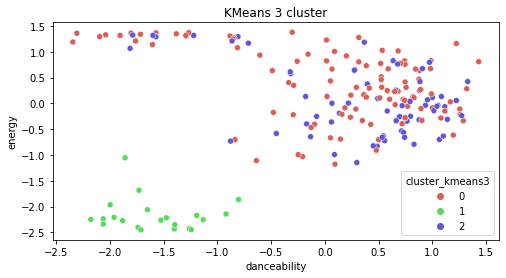

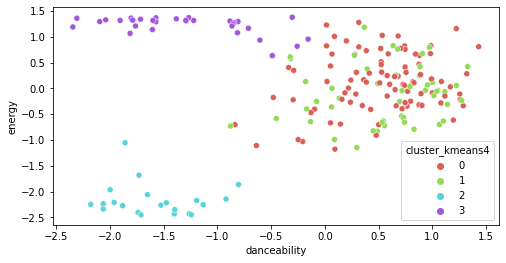

In [90]:
plt.figure(figsize=(8,4))
sns.scatterplot(data_cluster['danceability'], data_cluster['energy'], hue=data_cluster['cluster_kmeans3'], palette=sns.color_palette('hls', 3))
plt.title("KMeans 3 cluster")

plt.figure(figsize=(8,4))
sns.scatterplot(data_cluster['danceability'], data_cluster['energy'], hue=data_cluster['cluster_kmeans4'], palette=sns.color_palette('hls', 4))
plt.show()

# **Hierarchy**

In [91]:
data

,danceability,energy,key,loudness
0,0.769903,-0.055628,0.441095,0.417562
1,0.580139,0.248888,1.321780,0.235180
2,-1.738685,-2.403485,-1.320274,-2.772810
3,0.395003,0.376091,-0.733151,0.382222
4,0.695849,-0.256069,-1.320274,0.302018
...,...,...,...,...
190,-2.178382,-2.248529,1.028218,-1.538392
191,1.042978,-0.055628,-0.733151,-0.330095
192,-0.637128,-1.107943,1.028218,-0.311504
193,-0.289998,0.349108,1.321780,0.559841


Single linkage

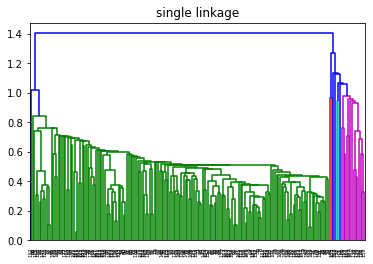

In [92]:
mergings_single = linkage(data, method="single", metric='euclidean')
dendrogram(mergings_single)
plt.title("single linkage")
plt.show()

Complete linkage

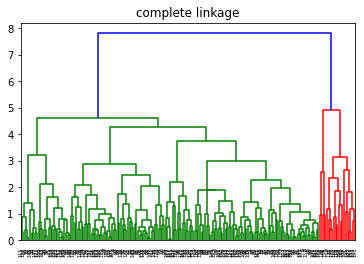

In [93]:
mergings_complete = linkage(data, method="complete", metric='euclidean')
dendrogram(mergings_complete)
plt.title("complete linkage")
plt.show()

In [94]:
# 3 clusters
cluster_hierarchy = cut_tree(mergings_complete, n_clusters=3).reshape(-1, )
cluster_hierarchy

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

tentukan cluster labels

In [95]:
data_cluster['cluster_hierarchy'] = cluster_hierarchy
data_cluster

,danceability,energy,key,loudness,cluster_kmeans3,cluster_kmeans4,cluster_hierarchy
0,0.769903,-0.055628,0.441095,0.417562,0,0,0
1,0.580139,0.248888,1.321780,0.235180,0,0,0
2,-1.738685,-2.403485,-1.320274,-2.772810,1,2,1
3,0.395003,0.376091,-0.733151,0.382222,2,1,0
4,0.695849,-0.256069,-1.320274,0.302018,2,1,0
...,...,...,...,...,...,...,...
190,-2.178382,-2.248529,1.028218,-1.538392,1,2,1
191,1.042978,-0.055628,-0.733151,-0.330095,2,1,0
192,-0.637128,-1.107943,1.028218,-0.311504,0,0,0
193,-0.289998,0.349108,1.321780,0.559841,0,0,0


tampilkan plot

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'hierarchical clustering')

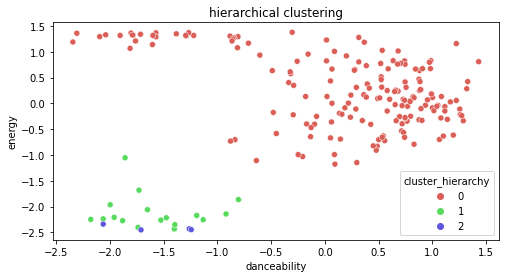

In [96]:
plt.figure(figsize=(8, 4))
sns.scatterplot(data_cluster['danceability'], data_cluster['energy'], hue=data_cluster['cluster_hierarchy'], palette=sns.color_palette('hls', 3))
plt.title('hierarchical clustering')

# **DBScan**

In [97]:
data

,danceability,energy,key,loudness
0,0.769903,-0.055628,0.441095,0.417562
1,0.580139,0.248888,1.321780,0.235180
2,-1.738685,-2.403485,-1.320274,-2.772810
3,0.395003,0.376091,-0.733151,0.382222
4,0.695849,-0.256069,-1.320274,0.302018
...,...,...,...,...
190,-2.178382,-2.248529,1.028218,-1.538392
191,1.042978,-0.055628,-0.733151,-0.330095
192,-0.637128,-1.107943,1.028218,-0.311504
193,-0.289998,0.349108,1.321780,0.559841


buat sebuah objek

In [98]:
db = DBSCAN(eps=1.2, min_samples=2, metric='euclidean')

In [99]:
db.fit(data)
set(db.labels_)

{0, 1, 2}

In [100]:
data_cluster['cluster_dbscan'] = db.labels_
data_cluster

,danceability,energy,key,loudness,cluster_kmeans3,cluster_kmeans4,cluster_hierarchy,cluster_dbscan
0,0.769903,-0.055628,0.441095,0.417562,0,0,0,0
1,0.580139,0.248888,1.321780,0.235180,0,0,0,0
2,-1.738685,-2.403485,-1.320274,-2.772810,1,2,1,1
3,0.395003,0.376091,-0.733151,0.382222,2,1,0,0
4,0.695849,-0.256069,-1.320274,0.302018,2,1,0,0
...,...,...,...,...,...,...,...,...
190,-2.178382,-2.248529,1.028218,-1.538392,1,2,1,1
191,1.042978,-0.055628,-0.733151,-0.330095,2,1,0,0
192,-0.637128,-1.107943,1.028218,-0.311504,0,0,0,0
193,-0.289998,0.349108,1.321780,0.559841,0,0,0,0


In [101]:
data_cluster.describe()

,danceability,energy,key,loudness,cluster_kmeans3,cluster_kmeans4,cluster_hierarchy,cluster_dbscan
count,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02,195.000000,195.000000,195.000000,195.000000
mean,-1.411976e-16,4.006766e-17,-3.188333e-17,2.157818e-16,0.805128,0.989744,0.128205,0.117949
std,1.002574e+00,1.002574e+00,1.002574e+00,1.002574e+00,0.926680,1.116833,0.391895,0.353824
min,-2.345004e+00,-2.451668e+00,-1.613836e+00,-5.036523e+00,0.000000,0.000000,0.000000,0.000000
25%,-8.060639e-01,-4.044724e-01,-1.026713e+00,-7.380833e-02,0.000000,0.000000,0.000000,0.000000
50%,3.163208e-01,7.928408e-02,1.475335e-01,2.636052e-01,0.000000,1.000000,0.000000,0.000000
75%,7.513895e-01,7.673361e-01,7.346565e-01,5.612237e-01,2.000000,2.000000,0.000000,0.000000
max,1.431763e+00,1.378296e+00,1.615341e+00,1.097920e+00,2.000000,3.000000,2.000000,2.000000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'DBSCAN Clustering')

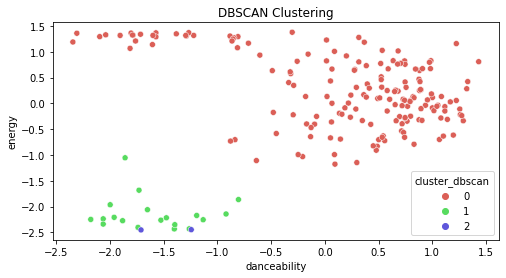

In [102]:
plt.figure(figsize=(8,4))
sns.scatterplot(data_cluster['danceability'], data_cluster['energy'], hue=data_cluster['cluster_dbscan'], palette=sns.color_palette('hls',3))
plt.title('DBSCAN Clustering')